# 图像特效-油画效果

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
src = cv2.imread('../datas/face2.jpg')
gray = cv2.imread('../datas/face2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [24]:
def oilpaint(src,intensity=20):
    dst = np.zeros_like(src)
    rows,cols = src.shape[0],src.shape[1]
    idx = np.arange(0,cols).reshape((cols,1)).astype(np.int32)
    idy = np.arange(0,rows).reshape((1,rows)).astype(np.int32)
    rx = np.zeros((cols,))
    ry = np.zeros((rows,))
    for i in range(cols):
        rx[i] = np.random.randint(0,intensity)
    for j in range(rows):
        ry[i] = np.random.randint(0,intensity)
    rx = rx.reshape((cols,1)).astype(np.int32)
    ry = ry.reshape((1,rows)).astype(np.int32)
    dx = rx + idx
    dy = ry + idy
    dx[dx >= cols] = cols - 1
    dy[dy >= rows] = rows - 1
    dst[(idy,idx)] = src[(dy,dx)]
    return dst

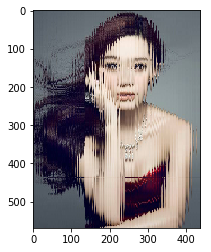

In [25]:
dst = oilpaint(rgb)
plt.imshow(dst)

In [34]:
def oilpaint2(src,intensity=20):
    dst = np.zeros_like(src)
    rows,cols = src.shape[0],src.shape[1]
    for i in range(rows):
        for j in range(cols):
            k = np.random.randint(0,intensity)
            dx = j + k
            dy = i + k
            if dy >= rows:
                dy = rows - 1
            if dx >= cols:
                dx = cols - 1
            dst[i,j] = src[dy,dx]
#     dst = cv2.GaussianBlur(dst,(5,5),2.4)
    return dst

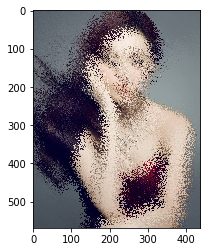

In [35]:
dst = oilpaint2(rgb,30)
plt.imshow(dst)